# Extracting TCRs from Human Cell Atlas

> Nicholas Ceglia 

See https://www.science.org/doi/10.1126/science.abl5197

Minor formatting NRW

In [2]:
%pip install scanpy scirpy 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!mkdir -p data/ 
!wget https://cellgeni.cog.sanger.ac.uk/pan-immune/adata_TILC_TCR_onlyseq.h5ad -P data/


mkdir: cannot create directory ‘data/’: File exists
--2023-01-10 18:20:02--  https://cellgeni.cog.sanger.ac.uk/pan-immune/adata_TILC_TCR_onlyseq.h5ad
Resolving cellgeni.cog.sanger.ac.uk (cellgeni.cog.sanger.ac.uk)... 193.62.203.62, 193.62.203.61, 193.62.203.63
Connecting to cellgeni.cog.sanger.ac.uk (cellgeni.cog.sanger.ac.uk)|193.62.203.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2970695988 (2.8G) [application/x-hdf]
Saving to: ‘adata_TILC_TCR_onlyseq.h5ad.1’

        adata_TILC_   3%[                    ]  90.38M  3.04MB/s    eta 14m 58s

In [10]:
import pandas as pd
import scanpy as sc
import scirpy as ir
from scipy.spatial import distance

In [2]:
adata = sc.read("data/adata_TILC_TCR_onlyseq.h5ad")

In [3]:
ir.io.upgrade_schema(adata)

In [4]:
ir.tl.chain_qc(adata)

<AxesSubplot: title={'center': 'Number of cells in receptor_subtype by donor_id'}, xlabel='receptor_subtype', ylabel='Number of cells'>

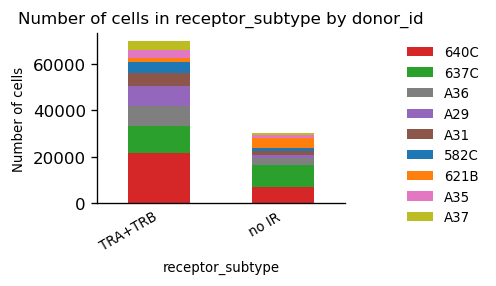

In [5]:
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="donor_id")

In [6]:
adata.obs["clone_id"] = adata.obs["IR_VDJ_1_junction"]

In [7]:
adata = adata[adata.obs["donor_id"].isin(["A36","637C","621B"])]
len(set(adata.obs["donor_id"]))

3

/opt/conda/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


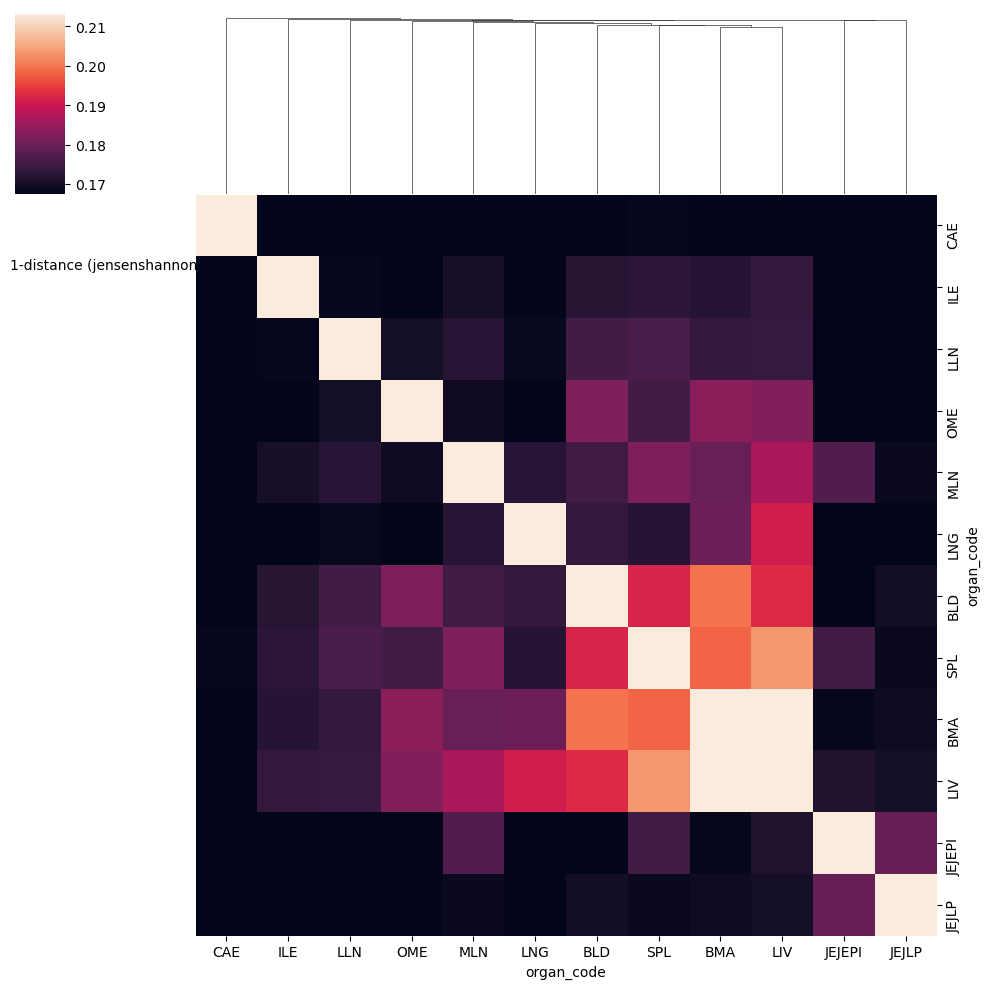

In [8]:
ir.tl.repertoire_overlap(adata, "organ_code",overlap_measure="jensenshannon")
ir.pl.repertoire_overlap(adata, "organ_code",overlap_measure="jensenshannon")

In [11]:
for p in set(adata.obs["donor_id"]):
    sub = adata[adata.obs["donor_id"]==p]
    ir.tl.repertoire_overlap(sub, "organ_code",overlap_measure="jensenshannon",fraction=False)
    df = sub.uns["repertoire_overlap"]["weighted"]
    distM = distance.pdist(df, lambda p, q: distance.jensenshannon(p,q,base=2))
    distM = distance.squareform(distM)
    distM = pd.DataFrame(distM, index=df.index, columns=df.index)
    distM.to_csv("{}_distances.csv".format(p))
    count = []
    tiss = []
    for x in set(sub.obs["organ_code"]):
        subsub=sub[sub.obs["organ_code"]==x]
        tiss.append(x)
        count.append(len(set(subsub.obs["IR_VDJ_1_junction"].tolist())))
    tiss_df = pd.DataFrame.from_dict({"Unique Clones":count,"Organ Code":tiss})
    tiss_df.to_csv("{}_unique_clone_counts.csv".format(p))

/opt/conda/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/conda/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/conda/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
